## Analysis background

Singapore is a rather expensive place to own a home, and there are a bunch of stakeholders in the condominium market. Both buyers and sellers are seeking good prices -- though with opposing targets :) -- so they need to know what affects the value of a condo.

We will be predicting the sale price of a condo based on the properties of the condo(e.g., selling price, property name, number of bedrooms, number of bath rooms, floor size, etc.).

## view data

In [119]:
import pandas as pd
import csv
import re
from pandas.core.frame import DataFrame

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [120]:
train_raw = pd.read_csv("dataset/train.csv")

test_raw  = pd.read_csv('dataset/test.csv')


#to play with our data we'll create a copy
#remember python assignment or equal passes by reference vs values, so we use the copy function: https://stackoverflow.com/questions/46327494/python-pandas-dataframe-copydeep-false-vs-copydeep-true-vs
train_data = train_raw.copy(deep = True)

#preview data
print (train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      26048 non-null  int64  
 1   name            26048 non-null  object 
 2   street          26048 non-null  object 
 3   type            26048 non-null  object 
 4   model           24768 non-null  object 
 5   market_segment  26048 non-null  object 
 6   type_of_area    26048 non-null  object 
 7   bedrooms        25644 non-null  object 
 8   bathrooms       24812 non-null  float64
 9   district        26048 non-null  int64  
 10  region          26048 non-null  object 
 11  planning_area   26048 non-null  object 
 12  subszone        26048 non-null  object 
 13  lat             26048 non-null  float64
 14  lng             26048 non-null  float64
 15  tenure          25761 non-null  object 
 16  built_year      16005 non-null  float64
 17  no_of_units     25006 non-null 

In [121]:
pd.set_option('display.max_columns', None)
train_data.head()

,listing_id,name,street,type,model,market_segment,type_of_area,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,eco_category,accessibility,date_listed,price
0,6998418,seascape,57 cove way,condominium,condominium,ocr,strata,3,4.0,4,central region,southern islands,sentosa,1.239337,103.837487,leasehold/99 years,2011.0,151.0,2336.0,uncategorized,guarded,2021-05-04,5390000.0
1,2046604,la maison,10 moulmein rise,apartment,apartment,ocr,strata,3,3.0,11,central region,novena,moulmein,1.319533,103.847030,freehold,1999.0,24.0,1259.0,uncategorized,guarded,2021-05-07,2310000.0
2,7563513,viva,2 suffolk walk,condominium,condominium,ocr,strata,4,3.0,11,central region,novena,moulmein,1.315656,103.844445,freehold,2012.0,235.0,1959.0,uncategorized,guarded,2021-06-30,5279500.0
3,3071445,urban treasures,205 jalan eunos,condominium,condominium,ocr,strata,3,2.0,14,east region,bedok,kaki bukit,1.329367,103.905791,freehold,NaN,237.0,883.0,uncategorized,guarded,2022-01-02,1843600.0
4,9667539,infini at east coast,east coast road,apartment,apartment,ocr,strata,3,3.0,15,east region,bedok,frankel,1.309176,103.911352,freehold,NaN,36.0,1066.0,uncategorized,guarded,2021-12-24,2262700.0


In [122]:
print ("row: " ,train_data.shape[0])
print ("column: " ,train_data.shape[1])
print ("feature: \n" ,train_data.columns.tolist())
print ("missing values：", train_data.isnull().sum().values.sum())
print ("repeated values：", train_data.listing_id.duplicated().sum())
print ("unique values:\n",train_data.nunique())

row:  26048
column:  23
feature: 
 ['listing_id', 'name', 'street', 'type', 'model', 'market_segment', 'type_of_area', 'bedrooms', 'bathrooms', 'district', 'region', 'planning_area', 'subszone', 'lat', 'lng', 'tenure', 'built_year', 'no_of_units', 'area_size', 'eco_category', 'accessibility', 'date_listed', 'price']
missing values： 14294
repeated values： 0
unique values:
 listing_id        26048
name               1650
street             3442
type                  2
model                14
market_segment        1
type_of_area          1
bedrooms             17
bathrooms             9
district             27
region                5
planning_area        38
subszone            193
lat                3118
lng                3118
tenure               53
built_year           60
no_of_units         526
area_size          1178
eco_category          1
accessibility         1
date_listed         359
price              4704
dtype: int64


In [123]:
train_data.describe()

,listing_id,bathrooms,district,lat,lng,built_year,no_of_units,area_size,price
count,2.604800e+04,24812.000000,26048.000000,26048.000000,26048.000000,16005.000000,25006.000000,26046.000000,2.604800e+04
mean,5.495573e+06,2.278091,12.211609,1.321145,103.846138,2010.926398,462.350636,1248.902096,2.994669e+06
std,2.608064e+06,1.147204,7.020134,0.038569,0.049865,11.915875,423.476259,1066.102020,4.324294e+06
min,1.000122e+06,1.000000,1.000000,1.239337,103.696215,1799.000000,1.000000,226.000000,5.566000e+05
25%,3.229224e+06,1.000000,7.000000,1.296472,103.820262,2010.000000,130.000000,678.000000,1.331000e+06
50%,5.486808e+06,2.000000,11.000000,1.313384,103.843081,2014.000000,366.000000,958.000000,1.851800e+06
75%,7.764926e+06,3.000000,18.000000,1.341210,103.879673,2016.000000,646.000000,1356.000000,2.948000e+06
max,9.999807e+06,10.000000,28.000000,1.456436,103.976016,2021.000000,2203.000000,15000.000000,7.480000e+07


## discovery of variable meanings

The meaning of 'bedrooms': '3+1'means that 3 bedrooms, one study room. About 40-100sqft more than 3 bedrooms. '3+2' means that 3 bedrooms, 2 study room. Study rooms are usually small.

So maybe we can change it from '3+1' into 3.5 bedrooms

In [124]:
train_data['bedrooms'].unique()

array(['3', '4', '2', '1', '3+1', '1+1', '2+1', nan, '5', '4+1', '7',
       '5+1', '6', '3+2', '2+2', '9', '8', '4+2'], dtype=object)

In [125]:
train_data['tenure'].unique()

array(['leasehold/99 years', 'freehold', nan, '999 years',
       '99 years from 18/04/2016', '956 years from 27/05/1928',
       '99 years from 12/08/2002', 'leasehold/60 years',
       '99 years from 14/08/2018', '9999 years from 02/06/1995',
       '99 years from 09/03/2016', 'leasehold/103 years',
       '99 years from 10/07/2013', '99 years from 25/06/2008',
       '99 years from 03/07/2019', '99 years from 12/07/2018',
       '946 years from 01/01/1938', '99 years',
       '99 years from 29/06/2015', '99 years from 16/04/2012',
       '99 years from 19/03/2001', '99 years from 04/12/2012',
       '99 years from 27/03/2018', '110 years from 01/11/2017',
       '99 years from 11/02/2009', '99 years from 10/12/2018',
       '99 years from 24/12/2018', '947 years from 05/10/1934',
       '998 years from 12/10/1885', '99 years from 01/09/1991',
       '99 years from 01/03/1991', '99 years from 21/03/2006',
       '947 years from 15/05/1937', '99 years from 13/03/2017',
       '99 year

3 types of condo tenures in Singapore: Freehold, 99-year leasehold, 999-year leasehold

The 999-year leasehold developments are in essence freehold properties.

Freehold properties can be held indefinitely by the buyer, while 99-year leasehold properties will revert back to the state after the tenure ends.

## correcting aberrant or non-acceptable data inputs

## 1. De-duplication

In [126]:
train_data.nunique()

listing_id        26048
name               1650
street             3442
type                  2
model                14
market_segment        1
type_of_area          1
bedrooms             17
bathrooms             9
district             27
region                5
planning_area        38
subszone            193
lat                3118
lng                3118
tenure               53
built_year           60
no_of_units         526
area_size          1178
eco_category          1
accessibility         1
date_listed         359
price              4704
dtype: int64

## 1.1 Drop unnecessary columns

Since the duplicated values are the same across train and test datasets, we can safely discard them.

In [127]:
train_data.drop(columns=["market_segment", "type_of_area", "eco_category", "accessibility"], inplace=True)
train_data.head()

,listing_id,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,date_listed,price
0,6998418,seascape,57 cove way,condominium,condominium,3,4.0,4,central region,southern islands,sentosa,1.239337,103.837487,leasehold/99 years,2011.0,151.0,2336.0,2021-05-04,5390000.0
1,2046604,la maison,10 moulmein rise,apartment,apartment,3,3.0,11,central region,novena,moulmein,1.319533,103.847030,freehold,1999.0,24.0,1259.0,2021-05-07,2310000.0
2,7563513,viva,2 suffolk walk,condominium,condominium,4,3.0,11,central region,novena,moulmein,1.315656,103.844445,freehold,2012.0,235.0,1959.0,2021-06-30,5279500.0
3,3071445,urban treasures,205 jalan eunos,condominium,condominium,3,2.0,14,east region,bedok,kaki bukit,1.329367,103.905791,freehold,NaN,237.0,883.0,2022-01-02,1843600.0
4,9667539,infini at east coast,east coast road,apartment,apartment,3,3.0,15,east region,bedok,frankel,1.309176,103.911352,freehold,NaN,36.0,1066.0,2021-12-24,2262700.0


## 1.2 Drop duplicate rows

Although it may seem that this contains no duplicates (all listing id are unique), we need to check whether their attributes are the same too.

An assumption made here is that:

if all attributes (except listing_id) are the same, they are duplicate records
if prices are different, they are unique records
Reason for removing 1) records:

it may affect our metrics, making us believe that our models are performing well
it is very unlikely for 1) to be unique records, thus they do not come from a real distribution

In [128]:
train_data.drop(columns=["listing_id", "price"]).duplicated().sum()

1098

In [129]:
# count records with duplicated everything
train_data.drop(columns=["listing_id"]).duplicated().sum()

326

In [130]:
def drop_complete_duplicates(df):
    attribute_columns = ['name', 'street', 'type', 'model', 'bedrooms', 'bathrooms', 'district',
       'region', 'planning_area', 'subszone', 'lat', 'lng', 'tenure',
       'built_year', 'no_of_units', 'area_size', 'date_listed', 'price']
    return df.drop_duplicates(subset=attribute_columns)
train_data = drop_complete_duplicates(train_data)

In [131]:
train_data.shape

(25722, 19)

In [132]:
train_data.columns

Index(['listing_id', 'name', 'street', 'type', 'model', 'bedrooms',
       'bathrooms', 'district', 'region', 'planning_area', 'subszone', 'lat',
       'lng', 'tenure', 'built_year', 'no_of_units', 'area_size',
       'date_listed', 'price'],
      dtype='object')

## 2. Visualatin and Observing abnormal values

In [133]:
def draw_hist(var_name):
    a=train_data.groupby(var_name).agg('count')['listing_id']
    a=DataFrame(a)
    print(a)
    b=list(a.index)
    b.reverse()
    c=[]
    for i in a.values:
        for j in i:
            c.append(j)
    c.reverse()
    colors = ['red', 'yellow', 'blue', 'green', 'gray','magenta']
    plt.barh(range(len(c)),c, tick_label=b,color=colors)
    plt.title(var_name, fontsize=25)
    plt.xticks(fontsize=15)
    plt.show()

In [134]:
var_name=['type','model','bedrooms','bathrooms','district','region','planning_area','tenure']

             listing_id
type                   
apartment         13752
condominium       11970


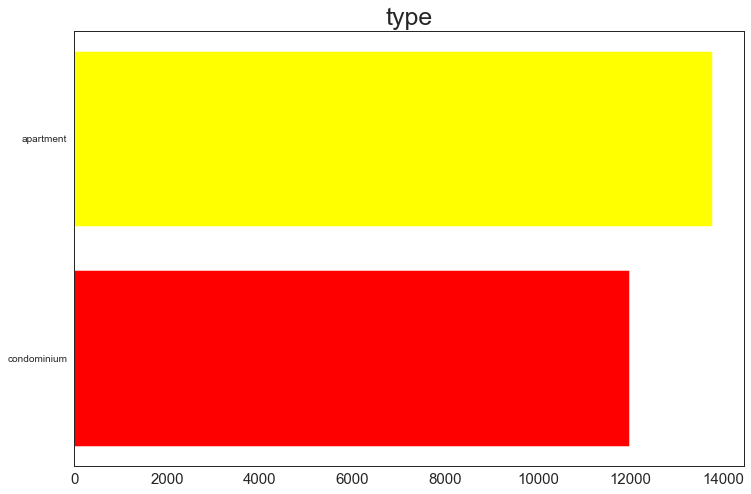

                                        listing_id
model                                             
apartment                                    13103
condominium                                  10669
duplex                                           2
executive condominium                          594
high rise                                        3
low rise                                         3
penthouse                                        4
residential with commercial on level 1           1
shophouse                                        1
soho                                             1
strata terrace                                   1
townhouse                                       10
walk-up apt                                     48
with pool                                        5


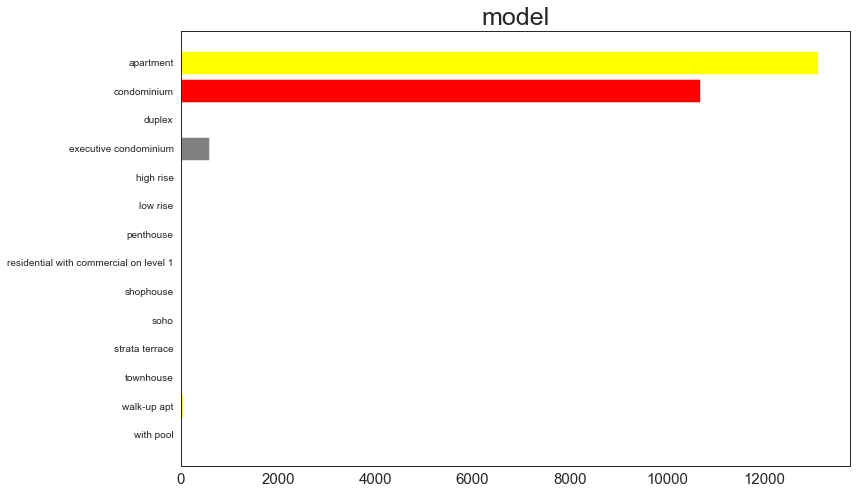

          listing_id
bedrooms            
1               4389
1+1              349
2               7094
2+1              528
2+2                4
3               7229
3+1              624
3+2                8
4               3733
4+1              415
4+2                6
5                806
5+1               60
6                 64
7                  9
8                  6
9                  1


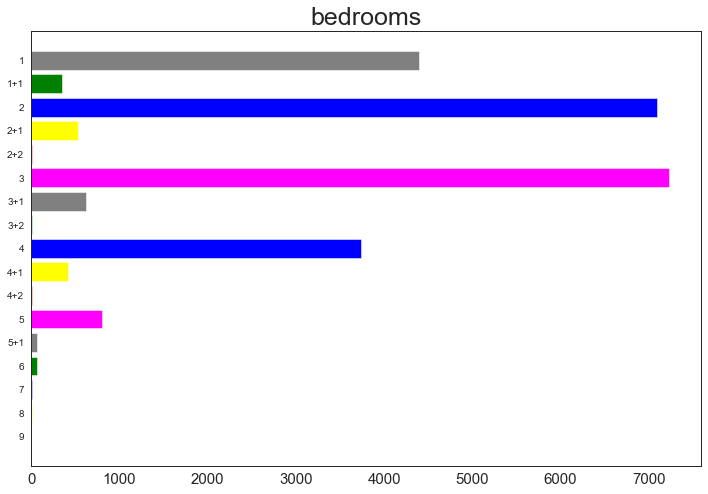

           listing_id
bathrooms            
1.0              6519
2.0              9608
3.0              4902
4.0              2278
5.0               858
6.0               253
7.0                60
8.0                 9
10.0                1


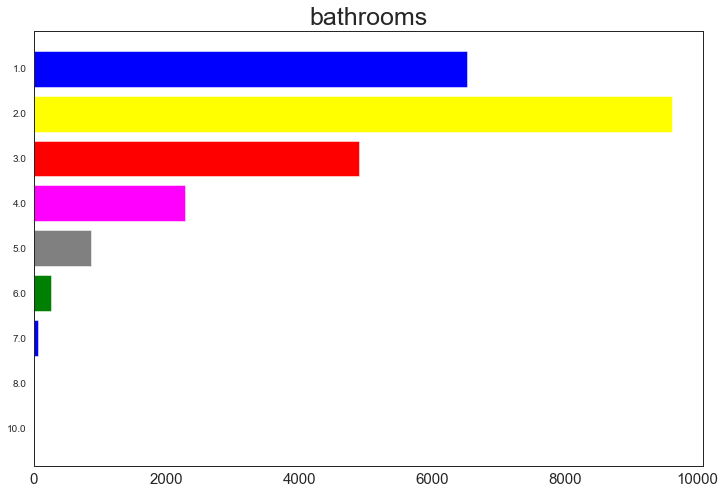

          listing_id
district            
1               1365
2                728
3               1005
4               1193
5               1535
6                331
7                671
8                362
9               2579
10              2963
11               857
12               620
13               532
14              1160
15              1749
16               630
17               459
18               829
19              2284
20               267
21              1031
22               344
23               938
25               193
26                39
27               629
28               429


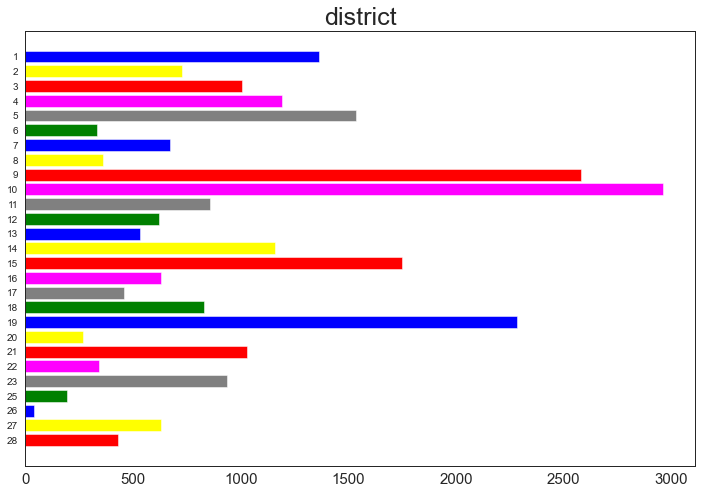

                   listing_id
region                       
central region          17447
east region              2532
north region              840
north-east region        2755
west region              2148


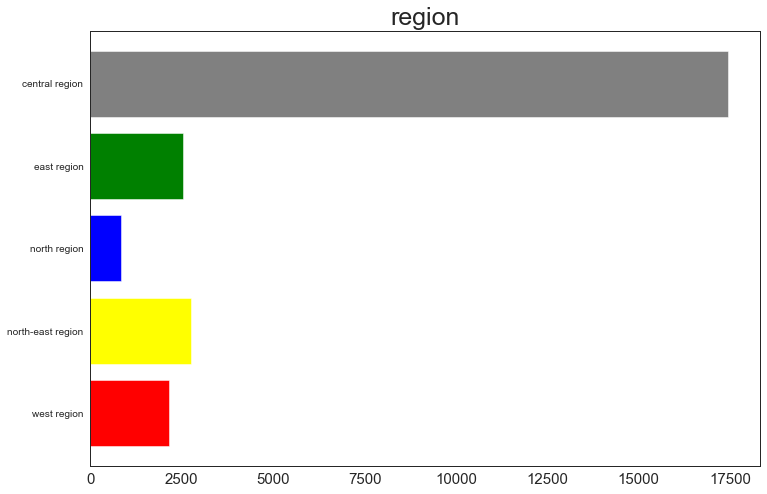

                  listing_id
planning_area               
ang mo kio               112
bedok                   1213
bishan                   203
bukit batok              522
bukit merah             1360
bukit panjang            339
bukit timah             1969
changi                     9
choa chu kang            111
clementi                 832
downtown core           2518
geylang                 1040
hougang                  921
jurong east              114
jurong west              230
kallang                  839
mandai                     8
marine parade            982
museum                   125
newton                   908
novena                  1373
orchard                  285
outram                   308
pasir ris                761
punggol                  223
queenstown              1151
river valley            1243
rochor                   295
sembawang                342
sengkang                 662
serangoon                837
singapore river          444
southern islan

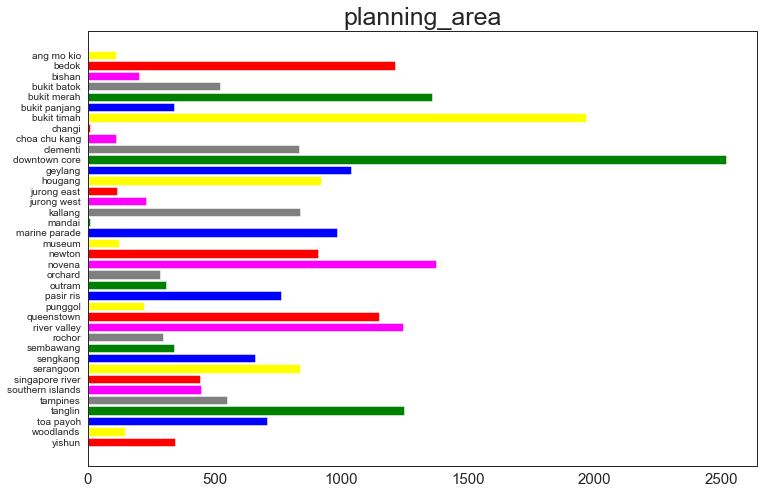

                            listing_id
tenure                                
100 years from 01/02/1986            2
110 years from 01/11/2017            8
929 years from 01/01/1953            5
946 years from 01/01/1938            8
946 years from 27/11/1937            2
947 years from 05/10/1934            1
947 years from 15/05/1937            2
956 years from 27/05/1928           15
99 years                             6
99 years from 01/03/1991             1
99 years from 01/09/1991             1
99 years from 01/12/1991             2
99 years from 01/12/1994             1
99 years from 01/12/1997             1
99 years from 02/02/1998             1
99 years from 03/07/2019             3
99 years from 03/08/2010             1
99 years from 03/10/2011             1
99 years from 04/06/2012             1
99 years from 04/12/2012             1
99 years from 09/03/2016             1
99 years from 10/01/2011             1
99 years from 10/07/2013             1
99 years from 10/12/2018 

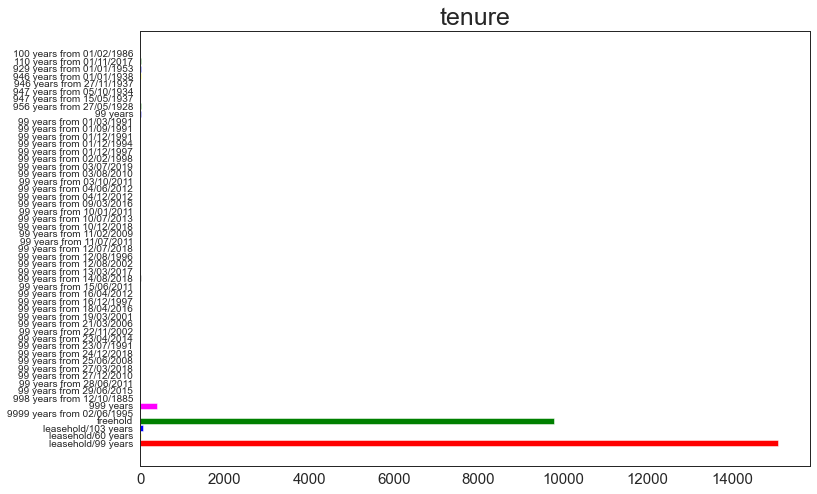

In [135]:
for i in var_name:
    draw_hist(i)

In [136]:
def check_outlier(var_name):
    a=train_data.groupby(var_name).agg('count')['listing_id']
    print('--------------',var_name,'--------------')
    print(train_data[var_name].describe())
    print('#########',var_name,'maximum value#####')
    print(a[a.values==a.max()])
    print('#########',var_name,'minimum value#####')
    print(a[a.values==a.min()])   

In [137]:
possible_outlier_1=['street','bedrooms','bathrooms','subszone']

In [138]:
for i in possible_outlier_1:
    check_outlier(i)

-------------- street --------------
count              25722
unique              3442
top       23 marina way 
freq                 262
Name: street, dtype: object
######### street maximum value#####
street
23 marina way     262
Name: listing_id, dtype: int64
######### street minimum value#####
street
1 ang mo kio street 66      1
1 ardmore park              1
1 balmoral crescent         1
1 bukit batok street 25     1
1 duchess road              1
                           ..
waterbank at dakota         1
woodlands view              1
yishun avenue 11            1
yishun avenue 6             1
yishun street 81            1
Name: listing_id, Length: 1392, dtype: int64
-------------- bedrooms --------------
count     25325
unique       17
top           3
freq       7229
Name: bedrooms, dtype: object
######### bedrooms maximum value#####
bedrooms
3    7229
Name: listing_id, dtype: int64
######### bedrooms minimum value#####
bedrooms
9    1
Name: listing_id, dtype: int64
-------------- 

In [139]:
descibe_ls=[ 'lat', 'lng','built_year', 'no_of_units', 'area_size', 'date_listed']

In [140]:
for i in descibe_ls:
    print('--------------',i,'--------------')
    print(train_data[i].describe())

-------------- lat --------------
count    25722.000000
mean         1.321151
std          0.038524
min          1.239337
25%          1.296472
50%          1.313488
75%          1.341075
max          1.456436
Name: lat, dtype: float64
-------------- lng --------------
count    25722.000000
mean       103.846109
std          0.049881
min        103.696215
25%        103.819801
50%        103.842768
75%        103.879628
max        103.976016
Name: lng, dtype: float64
-------------- built_year --------------
count    15794.000000
mean      2010.908889
std         11.953370
min       1799.000000
25%       2010.000000
50%       2014.000000
75%       2016.000000
max       2021.000000
Name: built_year, dtype: float64
-------------- no_of_units --------------
count    24684.000000
mean       461.681454
std        423.005464
min          1.000000
25%        130.000000
50%        366.000000
75%        646.000000
max       2203.000000
Name: no_of_units, dtype: float64
-------------- area_size -

In [141]:
train_data[train_data['bedrooms'] =='9']

,listing_id,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,date_listed,price
5033,9984819,boathouse residences,33 upper serangoon view,condominium,condominium,9,1.0,19,north-east region,hougang,kangkar,1.375579,103.903317,leasehold/99 years,2015.0,493.0,732.0,2021-12-21,935000.0


In [142]:
train_data[train_data['bedrooms'] =='8']

,listing_id,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,date_listed,price
5338,8492998,nouvel 18,18 anderson road,condominium,condominium,8,8.0,10,central region,newton,orange grove,1.310839,103.828325,freehold,2014.0,156.0,6782.0,2021-07-28,38500000.0
10229,1890783,reignwood hamilton scotts,37 scotts road,apartment,apartment,8,8.0,9,central region,newton,newton circus,1.311414,103.835966,freehold,2012.0,56.0,13950.0,2021-11-06,66000000.0
13556,3003165,reignwood hamilton scotts,37 scotts road,apartment,apartment,8,NaN,9,central region,newton,newton circus,1.311414,103.835966,freehold,2012.0,56.0,13950.0,2021-10-12,66000000.0
13660,6820177,reignwood hamilton scotts,37 scotts road,apartment,apartment,8,8.0,9,central region,newton,newton circus,1.311414,103.835966,freehold,2012.0,56.0,13980.0,2021-12-31,60486800.0
15631,3495801,beaverton court,45 mount sinai rise,condominium,condominium,8,6.0,10,central region,bukit timah,ulu pandan,1.316080,103.776088,freehold,1984.0,54.0,8902.0,2022-01-02,18700000.0
15673,6439234,opera estate,figaro street,apartment,walk-up apt,8,8.0,15,east region,bedok,frankel,1.315749,103.925857,freehold,1980.0,182.0,7000.0,2022-01-05,6050000.0


In [143]:
train_data[train_data['bathrooms'] ==10.0]

,listing_id,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,date_listed,price
17707,5405728,one pearl bank,1 pearl bank,apartment,apartment,NaN,10.0,3,central region,outram,pearl's hill,1.282961,103.839815,leasehold/99 years,NaN,774.0,5479.0,2021-12-27,19360000.0


In [144]:
train_data[train_data['bathrooms'] ==8.0]

,listing_id,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,date_listed,price
1794,6660298,parkwood residences,yio chu kang road,apartment,apartment,5,8.0,19,north-east region,hougang,kovan,1.366527,103.875828,leasehold/99 years,NaN,18.0,4585.0,2021-12-13,3337400.0
5338,8492998,nouvel 18,18 anderson road,condominium,condominium,8,8.0,10,central region,newton,orange grove,1.310839,103.828325,freehold,2014.0,156.0,6782.0,2021-07-28,38500000.0
7312,3312017,viva,suffolk walk,condominium,condominium,5+1,8.0,11,central region,novena,moulmein,1.315656,103.844445,freehold,2012.0,235.0,5575.0,2021-12-17,15331300.0
10229,1890783,reignwood hamilton scotts,37 scotts road,apartment,apartment,8,8.0,9,central region,newton,newton circus,1.311414,103.835966,freehold,2012.0,56.0,13950.0,2021-11-06,66000000.0
10908,6832879,reignwood hamilton scotts,scotts road,apartment,apartment,NaN,8.0,9,central region,newton,newton circus,1.311414,103.835966,freehold,2012.0,56.0,13950.0,2021-11-12,60500000.0
13660,6820177,reignwood hamilton scotts,37 scotts road,apartment,apartment,8,8.0,9,central region,newton,newton circus,1.311414,103.835966,freehold,2012.0,56.0,13980.0,2021-12-31,60486800.0
15673,6439234,opera estate,figaro street,apartment,walk-up apt,8,8.0,15,east region,bedok,frankel,1.315749,103.925857,freehold,1980.0,182.0,7000.0,2022-01-05,6050000.0
18578,1915325,the nassim,nassim hill,condominium,condominium,5,8.0,10,central region,tanglin,nassim,1.307135,103.822119,freehold,2015.0,55.0,7061.0,2021-11-27,49500000.0
19123,8545388,the tate residences,claymore road,condominium,condominium,6,8.0,9,central region,newton,orange grove,1.307975,103.830325,freehold,2009.0,85.0,6566.0,2021-10-12,44000000.0


In [145]:
train_data[train_data['built_year'] ==1799]

,listing_id,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,date_listed,price
4474,1451581,neu at novena,27 moulmein rise,apartment,apartment,2,2.0,11,central region,novena,moulmein,1.319615,103.845969,freehold,1799.0,87.0,657.0,2021-12-10,1985500.0
9240,5615190,parc clematis,jalan lempeng,apartment,apartment,3,2.0,5,west region,clementi,faber,1.317106,103.758947,leasehold/99 years,1799.0,1468.0,861.0,2022-01-01,1527900.0
20719,2331916,cuscaden reserve,8 cuscaden road,condominium,condominium,3+1,2.0,10,central region,orchard,tanglin,1.303610,103.825167,leasehold/99 years,1799.0,192.0,1163.0,2021-04-16,4680500.0
25410,5626883,cuscaden reserve,8 cuscaden road,condominium,condominium,3+1,2.0,10,central region,orchard,tanglin,1.303610,103.825167,leasehold/99 years,1799.0,192.0,1163.0,2021-12-28,4680500.0
25749,5645883,neu at novena,27 moulmein rise,apartment,apartment,3,2.0,11,central region,novena,moulmein,1.319615,103.845969,freehold,1799.0,87.0,861.0,2021-12-10,2460700.0


In [146]:
train_data[train_data['no_of_units'] ==1]

,listing_id,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,date_listed,price
23519,9921187,frankel estate,changi road,apartment,apartment,3,2.0,14,east region,bedok,frankel,1.319362,103.914461,freehold,2013.0,1.0,915.0,2021-10-03,1650000.0


In [147]:
train_data[train_data['no_of_units'] <5]

,listing_id,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,date_listed,price
741,8782180,hillview garden estate,55 jalan dermawan,apartment,apartment,2,1.0,23,west region,bukit batok,hillview,1.359528,103.760253,freehold,1997.0,4.0,463.0,2021-08-01,990000.0
9482,8379473,emerald apartments,emerald hill road,apartment,apartment,3,3.0,9,central region,newton,cairnhill,1.305141,103.839659,freehold,NaN,4.0,1173.0,2021-11-06,2640000.0
9654,6698952,hillview garden estate,8 lorong kemunchup,apartment,apartment,5,4.0,23,west region,bukit batok,hillview,1.360524,103.761186,998 years from 12/10/1885,1997.0,4.0,3303.0,2021-10-25,4950000.0
12596,8586264,whampoa drive,4 whampoa drive,apartment,walk-up apt,4,2.0,12,central region,novena,balestier,1.322476,103.853239,999 years,1970.0,4.0,1033.0,2021-10-05,1320000.0
15860,2919063,hillview garden estate,lorong kemunchup,apartment,apartment,4,3.0,23,west region,bukit batok,hillview,1.360565,103.761337,998 years from 12/10/1885,1997.0,4.0,3303.0,2021-10-23,4950000.0
21672,3679636,hillview garden estate,34 jalan dermawan,apartment,apartment,5,4.0,23,west region,bukit batok,hillview,1.359526,103.761055,998 years from 12/10/1885,1997.0,4.0,3303.0,2021-10-31,5170000.0
23107,4581140,hillview garden estate,55 jalan dermawan,apartment,apartment,1,1.0,23,west region,bukit batok,hillview,1.359528,103.760253,freehold,1997.0,4.0,463.0,2021-11-23,935000.0
23519,9921187,frankel estate,changi road,apartment,apartment,3,2.0,14,east region,bedok,frankel,1.319362,103.914461,freehold,2013.0,1.0,915.0,2021-10-03,1650000.0
25183,1398200,emerald apartments,emerald hill road,apartment,apartment,3,3.0,9,central region,newton,cairnhill,1.305141,103.839659,freehold,1960.0,4.0,1173.0,2022-01-03,2640000.0


In [148]:
train_data[train_data['area_size'] ==15000]

,listing_id,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,date_listed,price
4402,3220367,the berth by the cove,ocean drive,condominium,NaN,5,5.0,4,central region,southern islands,sentosa,1.250048,103.846319,leasehold/99 years,2006.0,200.0,15000.0,2021-10-12,20350000.0


In [149]:
train_data[train_data['area_size'] ==226.0]

,listing_id,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,date_listed,price
4100,8675117,gem residences,3 lorong 5 toa payoh,condominium,condominium,2,2.0,12,central region,toa payoh,boon teck,1.339338,103.851225,leasehold/99 years,2019.0,578.0,226.0,2021-05-04,1320000.0


## Summarize:

(1) 

‘bedrooms':The number of study rooms behind the plus sign is equivalent to 0.5 bedrooms for calculation.Like change it from '3+1' into 3.5 bedrooms

(2) 

'tenure':If the tenure value contains a specific date, subtract the specific year from the current 2022 to get the year difference. Finally, subtract the the years difference from the year displayed by the tenure value to get the real tenure of the property in 2022.

To simplize 'tenure' value: Divide tenure into two types including 99years and 999 years.

(3) 

model and type: model is a subdivision of type. However, except for condo and apartment, the values of model are very small and can be ignored. So we can delete the model and use the type variable.

(4) 

Reasonal:

street: 'marina way'

built_year =1799

area_size=15000


Outlier:--Delete

bedrooms=9 

bathrooms=10

no_of_units =1

area_size=226.0

## data transformation and drop outlier

In [150]:
train_data.drop(columns=["model"], inplace=True)

In [151]:
drop_idx=[]

In [152]:
drop_idx.append(train_data[train_data['bedrooms'] =='9'].index.values[0])
drop_idx.append(train_data[train_data['bathrooms'] ==10.0].index.values[0])
drop_idx.append(train_data[train_data['no_of_units'] ==1].index.values[0])
drop_idx.append(train_data[train_data['area_size'] ==226.0].index.values[0])

drop_idx

[5033, 17707, 23519, 4100]

In [153]:
train_data.drop(drop_idx, axis=0,inplace=True)

In [154]:
train_data.reset_index(inplace=True)

In [155]:
train_data['bedrooms_1']=0
change=train_data.loc[:,'bedrooms']
for i in range(len(change)):
    a=change[i]
    if type(a) != float:
        if len(a.strip())>1:
            if '+' in a:
                b=a.split('+')
                train_data['bedrooms_1'][i]=int(b[0])+int(b[1])*0.5
        else:
            train_data['bedrooms_1'][i]=int(a)
    else:
        train_data['bedrooms_1'][i]=0

/var/folders/1p/9tstkhcj32z3fsm0mql8_17h0000gn/T/ipykernel_7946/742973328.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['bedrooms_1'][i]=int(a)
/var/folders/1p/9tstkhcj32z3fsm0mql8_17h0000gn/T/ipykernel_7946/742973328.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['bedrooms_1'][i]=int(b[0])+int(b[1])*0.5


In [156]:
train_data['bedrooms_1'].unique()

array([3. , 4. , 2. , 1. , 3.5, 1.5, 2.5, 0. , 5. , 4.5, 7. , 5.5, 6. ,
       8. ])

In [157]:
train_data['time_period']=None
import time, datetime
change=train_data.loc[:,'tenure']
for b in range(len(change)):
    i=change[b]
    if type(i)==str:
        if i=='freehold':
            train_data['time_period'][b]=1000000
        elif i=='NaN':
            train_data['time_period'][b]=0
        elif len(i)<=9:
            c=i.split(' ')
            train_data['time_period'][b]=int(c[0])
        elif len(i)<=19:
            c=i.split(' ')
            d=c[0].split('/')
            train_data['time_period'][b]=int(d[1])
        else:
            c=i.split(' ')
            timeArray = time.strptime(c[3], "%d/%m/%Y")
            d=int(c[0])-(2022-int(timeArray.tm_year))
            train_data['time_period'][b]=d
    else:
        train_data['time_period'][b]=0

/var/folders/1p/9tstkhcj32z3fsm0mql8_17h0000gn/T/ipykernel_7946/1353107822.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['time_period'][b]=int(d[1])
/var/folders/1p/9tstkhcj32z3fsm0mql8_17h0000gn/T/ipykernel_7946/1353107822.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['time_period'][b]=1000000
/var/folders/1p/9tstkhcj32z3fsm0mql8_17h0000gn/T/ipykernel_7946/1353107822.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [158]:
train_data['time_period'].unique()

array([99, 1000000, 0, 999, 93, 862, 79, 60, 95, 9972, 103, 90, 85, 96,
       92, 89, 78, 105, 86, 859, 861, 68, 83, 94, 91, 87, 860, 73, 88, 64,
       74, 71, 75], dtype=object)

In [159]:
train_data['tenure_change']=None
import time, datetime
change=train_data.loc[:,'time_period']
for i in range(len(change)):
    a=change[i]
    if a !=0 and a<120:
        train_data['tenure_change'][i]=99
    else:
        train_data['tenure_change'][i]=999

/var/folders/1p/9tstkhcj32z3fsm0mql8_17h0000gn/T/ipykernel_7946/1959588135.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['tenure_change'][i]=99
/var/folders/1p/9tstkhcj32z3fsm0mql8_17h0000gn/T/ipykernel_7946/1959588135.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['tenure_change'][i]=999


In [160]:
train_data['tenure_change'].unique()

array([99, 999], dtype=object)

In [165]:
train_data.to_csv('./ronghua.csv') 

In [167]:
a = pd.read_csv("ronghua.csv")

In [168]:
a.head()

,Unnamed: 0,index,listing_id,name,street,type,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,date_listed,price,bedrooms_1,time_period,tenure_change
0,0,0,6998418,seascape,57 cove way,condominium,3,4.0,4,central region,southern islands,sentosa,1.239337,103.837487,leasehold/99 years,2011.0,151.0,2336.0,2021-05-04,5390000.0,3.0,99,99
1,1,1,2046604,la maison,10 moulmein rise,apartment,3,3.0,11,central region,novena,moulmein,1.319533,103.847030,freehold,1999.0,24.0,1259.0,2021-05-07,2310000.0,3.0,1000000,999
2,2,2,7563513,viva,2 suffolk walk,condominium,4,3.0,11,central region,novena,moulmein,1.315656,103.844445,freehold,2012.0,235.0,1959.0,2021-06-30,5279500.0,4.0,1000000,999
3,3,3,3071445,urban treasures,205 jalan eunos,condominium,3,2.0,14,east region,bedok,kaki bukit,1.329367,103.905791,freehold,NaN,237.0,883.0,2022-01-02,1843600.0,3.0,1000000,999
4,4,4,9667539,infini at east coast,east coast road,apartment,3,3.0,15,east region,bedok,frankel,1.309176,103.911352,freehold,NaN,36.0,1066.0,2021-12-24,2262700.0,3.0,1000000,999
